# Ex - GroupBy

### Introduction:

GroupBy can be summarized as Split-Apply-Combine.

Check out this [Diagram](http://i.imgur.com/yjNkiwL.png)  
### Step 1. Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv). 

In [3]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'
drinks_df =pd.read_csv(url)

### Step 3. Assign it to a variable called drinks.

In [4]:
drinks= drinks_df
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


### Step 4. Which continent drinks more beer on average?

In [5]:
print(drinks.groupby("continent")['beer_servings'].mean().idxmax())

EU


### Step 5. For each continent print the statistics for wine consumption.

In [6]:
drinks.groupby("continent")['wine_servings'].describe().T

continent,AF,AS,EU,OC,SA
count,53.000000,44.000000,45.000000,16.00000,12.000000
mean,16.264151,9.068182,142.222222,35.62500,62.416667
std,38.846419,21.667034,97.421738,64.55579,88.620189
min,0.000000,0.000000,0.000000,0.00000,1.000000
25%,1.000000,0.000000,59.000000,1.00000,3.000000
50%,2.000000,1.000000,128.000000,8.50000,12.000000
75%,13.000000,8.000000,195.000000,23.25000,98.500000
max,233.000000,123.000000,370.000000,212.00000,221.000000


### Step 6. Print the mean alcohol consumption per continent for every column

In [7]:
drinks.groupby("continent").mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


### Step 7. Print the median alcohol consumption per continent for every column

In [8]:
drinks.groupby("continent").median()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


### Step 8. Print the mean, min and max values for spirit consumption.
#### This time output a DataFrame

In [9]:
print("Mean for spirit consumption = ",drinks['spirit_servings'].mean())
print("Min for spirit consumption = ",drinks['spirit_servings'].min())
print("Max for spirit consumption = ",drinks['spirit_servings'].max())

Mean for spirit consumption =  80.99481865284974
Min for spirit consumption =  0
Max for spirit consumption =  438


Extra Questions: 

Find Categorical/Numerical Data.

In [10]:
categorical_columns = drinks.select_dtypes(include=['object']).columns.tolist()
numerical_columns = drinks.select_dtypes(include=['int','float']).columns.tolist()
print("Categorical Columns = ", categorical_columns, "\n Numerical Columns = ", numerical_columns)

Categorical Columns =  ['country', 'continent'] 
 Numerical Columns =  ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']


Find Outliners

<AxesSubplot:>

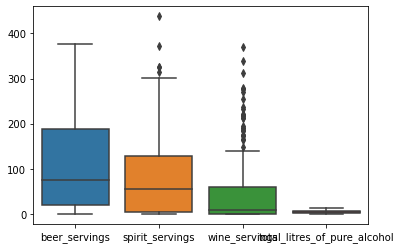

In [11]:
import seaborn as sns

sns.boxplot(data=drinks)

In [12]:
drinks['spirit_servings'].describe()

count    193.000000
mean      80.994819
std       88.284312
min        0.000000
25%        4.000000
50%       56.000000
75%      128.000000
max      438.000000
Name: spirit_servings, dtype: float64

In [13]:
drinks['wine_servings'].describe()

count    193.000000
mean      49.450777
std       79.697598
min        0.000000
25%        1.000000
50%        8.000000
75%       59.000000
max      370.000000
Name: wine_servings, dtype: float64

On the above aspects, spirit servings and wine servings are outliners since they have few datas on higher side. 

Find Skewness

The right skewness are spirit servings, beer servings and wine servings. 

Write five observations

Text(0.5, 1.0, 'Top 10 countries with highest beer consumption')

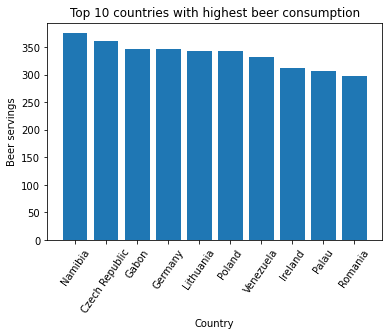

In [15]:
import matplotlib.pyplot as plt
beer_top_10 = drinks.sort_values('beer_servings', ascending=False).head(10)
plt.bar(beer_top_10['country'], beer_top_10['beer_servings'])
plt.xticks(rotation=55)
plt.xlabel('Country')
plt.ylabel('Beer servings')
plt.title('Top 10 countries with highest beer consumption')

Nambia has highest consumption among others

Text(0.5, 1.0, 'Distribution of wine servings per capita across all countries')

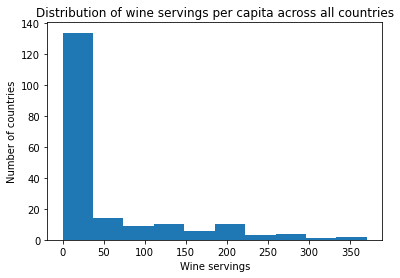

In [16]:
plt.hist(drinks['wine_servings'])
plt.xlabel('Wine servings')
plt.ylabel('Number of countries')
plt.title('Distribution of wine servings per capita across all countries')

Majority of countires has wine servings below 40 liters.

Text(0.5, 1.0, 'Relationship between beer and spirit servings')

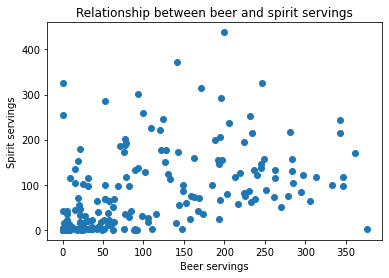

In [17]:
plt.scatter(drinks['beer_servings'], drinks['spirit_servings'])
plt.xlabel('Beer servings')
plt.ylabel('Spirit servings')
plt.title('Relationship between beer and spirit servings')

There is positive corealation between beer and spirit servings.Those countries with higher beer consumption has higher spirit consumption.

Text(0, 0.5, 'Average alcohol consumption (liters)')

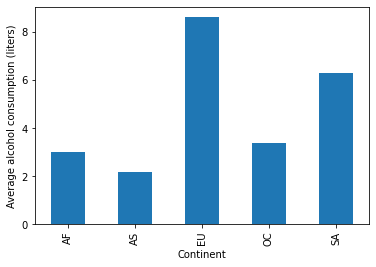

In [18]:
continent_avg = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_avg.plot(kind='bar')
plt.xlabel('Continent')
plt.ylabel('Average alcohol consumption (liters)')

Europe has highest alcohol consumption compared to other continents.

Text(0.5, 1.0, 'Top 5 countries with highest total litres of pure alcohol consumed')

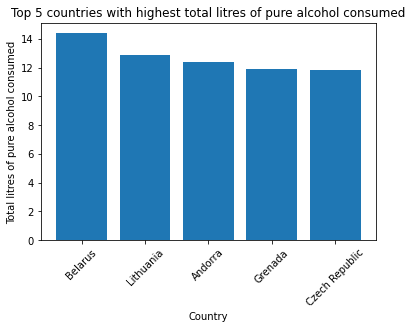

In [19]:
Top_5 = drinks.sort_values('total_litres_of_pure_alcohol', ascending=False).head(5)
plt.bar(Top_5['country'], Top_5['total_litres_of_pure_alcohol'])
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Total litres of pure alcohol consumed')
plt.title('Top 5 countries with highest total litres of pure alcohol consumed')

Belarus has highest cosumption of total litres of pure alcohol.